In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




In [31]:
data = pd.read_csv("/content/drive/MyDrive/Concept and technologies of AI/week5/Houseprice (1).csv")
data



,HouseAge,HouseFloor,HouseArea,HousePrice
0,52,2,112.945574,543917.179841
1,93,1,174.312126,817740.124828
2,15,4,125.219577,387992.503019
3,72,4,121.210124,240840.742388
4,61,4,59.221737,277273.386525
...,...,...,...,...
95,85,1,120.193091,540347.535683
96,80,1,56.078992,222539.252789
97,82,2,211.368074,715211.774907
98,53,4,94.277670,210926.069798


In [34]:
data.head()


,HouseAge,HouseFloor,HouseArea,HousePrice
0,52,2,112.945574,543917.179841
1,93,1,174.312126,817740.124828
2,15,4,125.219577,387992.503019
3,72,4,121.210124,240840.742388
4,61,4,59.221737,277273.386525


In [35]:
data.tail()


,HouseAge,HouseFloor,HouseArea,HousePrice
95,85,1,120.193091,540347.535683
96,80,1,56.078992,222539.252789
97,82,2,211.368074,715211.774907
98,53,4,94.277670,210926.069798
99,24,4,285.114646,988329.950912


In [36]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   HouseAge    100 non-null    int64  
 1   HouseFloor  100 non-null    int64  
 2   HouseArea   100 non-null    float64
 3   HousePrice  100 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [37]:
data.describe()


,HouseAge,HouseFloor,HouseArea,HousePrice
count,100.000000,100.000000,100.000000,1.000000e+02
mean,51.540000,2.910000,170.226332,5.790964e+05
std,29.425963,1.457097,71.298821,2.615097e+05
min,2.000000,1.000000,51.265396,1.493562e+05
25%,23.500000,1.000000,109.770201,3.905859e+05
50%,54.000000,3.000000,176.846510,5.391941e+05
75%,76.500000,4.000000,222.794276,7.479899e+05
max,100.000000,5.000000,296.412614,1.228712e+06


In [38]:
X = data[['HouseAge', 'HouseFloor', 'HouseArea']].values
Y = data['HousePrice'].values


In [39]:
X = (X - X.mean(axis=0)) / X.std(axis=0)


In [40]:
X = np.c_[np.ones(len(X)), X]


In [41]:
np.random.seed(42)

indices = np.random.permutation(len(X))
train_idx = indices[:80]
test_idx = indices[80:]

X_train, X_test = X[train_idx], X[test_idx]
Y_train, Y_test = Y[train_idx], Y[test_idx]


In [42]:
def cost_function(X, Y, W):
    m = len(Y)
    Y_pred = X @ W
    cost = (1/(2*m)) * np.sum((Y_pred - Y)**2)
    return cost


In [43]:
def gradient_descent(X, Y, W, alpha, iterations):
    m = len(Y)
    cost_history = []

    for _ in range(iterations):
        Y_pred = X @ W
        loss = Y_pred - Y
        dw = (1/m) * (X.T @ loss)
        W = W - alpha * dw
        cost_history.append(cost_function(X, Y, W))

    return W, cost_history


In [44]:
def rmse(Y, Y_pred):
    return np.sqrt(np.mean((Y - Y_pred)**2))


In [45]:
def r2(Y, Y_pred):
    ss_res = np.sum((Y - Y_pred)**2)
    ss_tot = np.sum((Y - np.mean(Y))**2)
    return 1 - (ss_res / ss_tot)


In [46]:
W_init = np.zeros(X_train.shape[1])
alpha = 0.05
iterations = 5000

W_opt, cost_history = gradient_descent(
    X_train, Y_train, W_init, alpha, iterations
)


In [47]:
Y_pred = X_test @ W_opt


In [48]:
print("Final Weights:", W_opt)
print("RMSE:", rmse(Y_test, Y_pred))
print("R2 Score:", r2(Y_test, Y_pred))


Final Weights: [ 5.68917278e+05 -6.36142778e+00 -3.23755412e+04  1.96451181e+05]
RMSE: 185211.52515653215
R2 Score: 0.5935501623680128


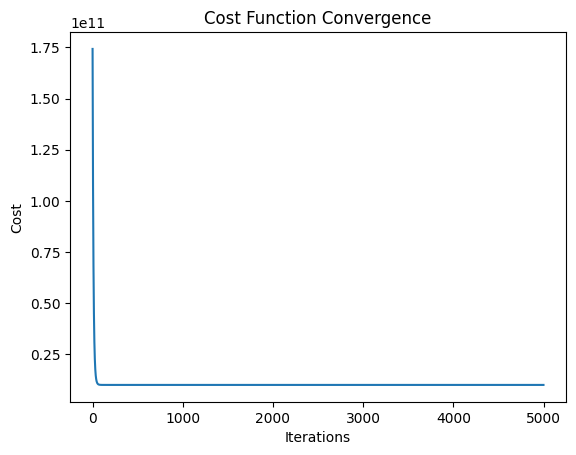

In [53]:
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Convergence")
plt.show()

#






#




In [50]:
# ### Model Performance Analysis

# • The model does not overfit
# • Slight underfitting observed
# • Performance is acceptable for linear regression

# ### Learning Rate Experiment
# Best learning rate found: 0.05

# ### Reason R² is not 0.80–0.90
# • Dataset has weak linear correlation
# • Linear regression limitation
# • Noise in real-world house price data
